<a href="https://colab.research.google.com/github/alex-kondr/Data_Science_HW_6/blob/main/HW_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
data_path = '/content/gdrive/MyDrive/Colab Notebooks/HW_06/'
df_data_2d = pd.read_csv(data_path+'data_2d.csv')
df_mnist = pd.read_csv(data_path+'mnist.csv')

Mounted at /content/gdrive


In [ ]:
df_data_2d.shape

(199, 3)

In [ ]:
df_data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [3]:
data_2d = np.array(df_data_2d)

In [ ]:
data_2d.shape

(199, 3)

In [4]:
y = data_2d[:, 0]
X = data_2d[:, 1:3]

In [ ]:
X[:5]

array([[ 2.68784756,  2.36696066],
       [-0.20137936,  0.47042993],
       [ 0.60849568,  1.22540003],
       [-0.0822819 ,  1.13721812],
       [ 2.0830693 ,  2.69448209]])

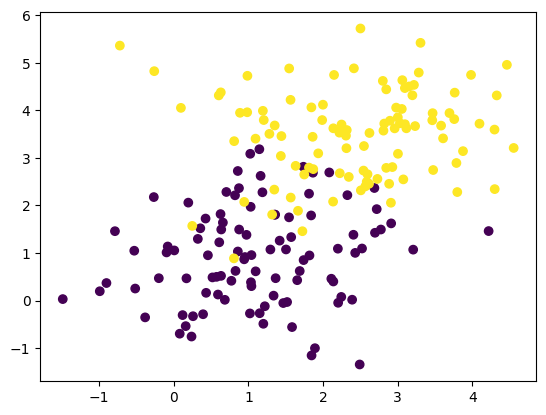

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [5]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)


In [ ]:
y_predict = kmeans.predict(X)

In [ ]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
y_predict[:5]

array([0, 1, 1, 1, 0], dtype=int32)

In [6]:
y_labels = kmeans.labels_

In [20]:
y_labels

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0], dtype=int32)

In [18]:
y.T[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
adjusted_rand_score(y.T[0], y_labels)

0.6205231018809018

In [7]:
cluster_centers = kmeans.cluster_centers_

In [ ]:
cluster_centers

array([[2.46540572, 3.48660748],
       [0.99657712, 0.80580517]])

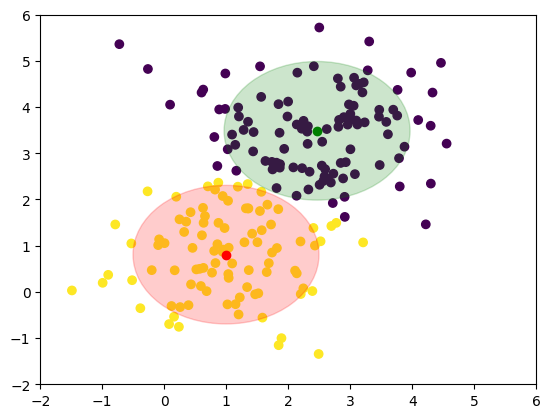

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=y_labels)
plt.scatter(cluster_centers[0, 0], cluster_centers[0, 1], c='g')
plt.scatter(cluster_centers[1, 0], cluster_centers[1, 1], c='r')
plt.axis([-2, 6, -2, 6])
c1 = plt.Circle((cluster_centers[0,0], cluster_centers[0,1]), radius=1.5, color='g', alpha=.2)
c2 = plt.Circle((cluster_centers[1,0], cluster_centers[1,1]), radius=1.5, color='r', alpha=.2)
plt.gca().add_artist(c1)
plt.gca().add_artist(c2)
plt.show()

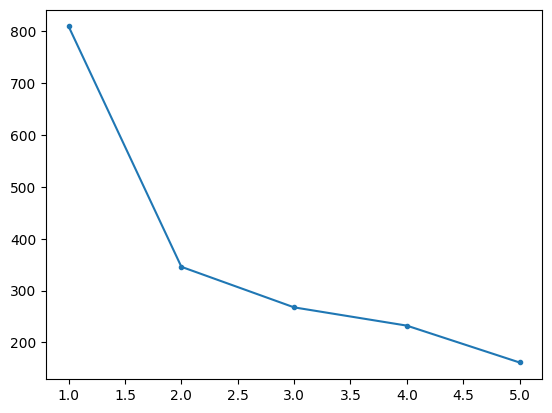

In [36]:
cost = []

for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X)
    cost.append(kmeans.inertia_)

plt.plot(range(1, 6), cost, marker=".")
plt.show()

In [35]:
X_norm = StandardScaler().fit_transform(X)
kmeans_norm = KMeans(n_clusters=2, n_init="auto").fit(X_norm)
y_labels_norm = kmeans_norm.labels_
adjusted_rand_score(y.T[0], y_labels_norm)

0.6046886047743085

In [38]:
mnist = np.array(df_mnist)

In [42]:
df_mnist.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X_norm = StandardScaler().fit_transform(mnist)
X_pca = PCA(n_components=2).fit_transform(X_norm)

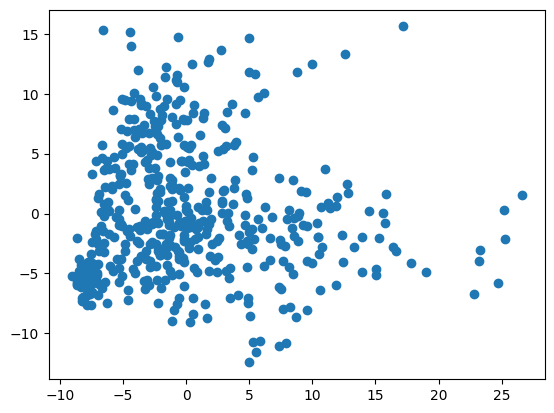

In [48]:
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.show()

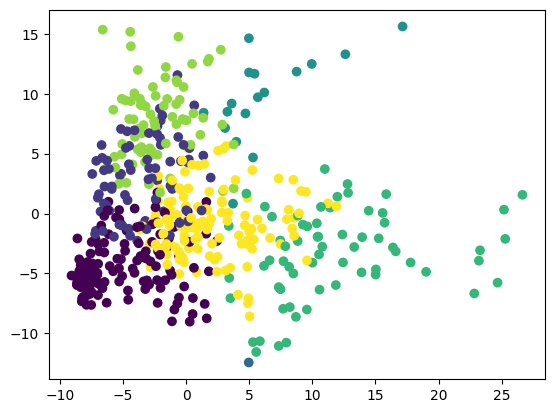

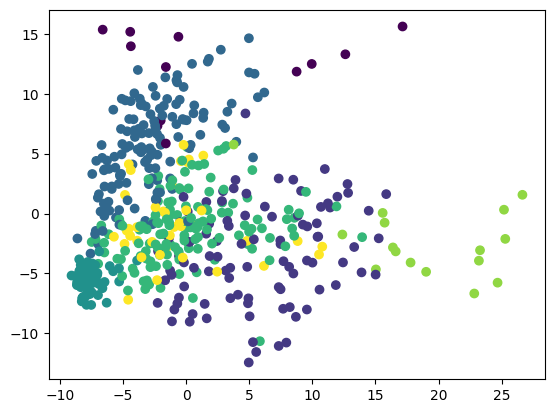

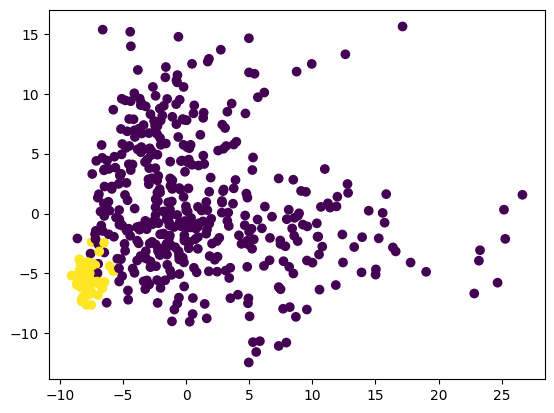

In [62]:
kmeans = KMeans(n_clusters=7, n_init='auto').fit(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.show()

agg_cl = AgglomerativeClustering(n_clusters=7).fit(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_cl.labels_)
plt.show()

dbscan_cl = DBSCAN(eps=10).fit(X_norm)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_cl.labels_)
plt.show()

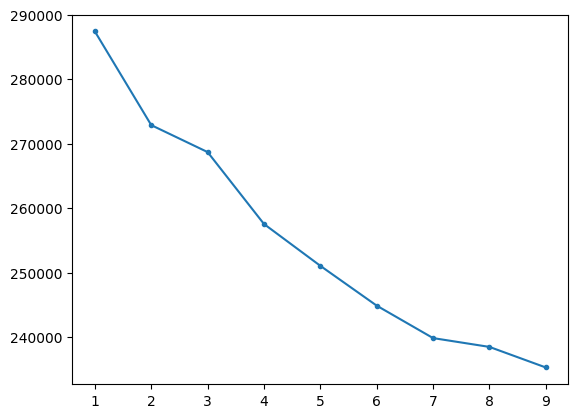

In [59]:
cost = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init="auto").fit(X_norm)
    cost.append(kmeans.inertia_)

plt.plot(range(1, 10), cost, marker=".")
plt.show()